importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime
from scipy.stats import ttest_ind
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor


In [ ]:
housing = fetch_openml(name="house_prices", as_frame=True, return_X_y=True)
X, y = housing

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

print("First few rows of the dataset:")
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  Sa

In [ ]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

handling the missing values

In [ ]:
missing_values = df.isnull().sum()
missing_values = pd.DataFrame(missing_values)

missing_values[missing_values[0]>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
numeric_df = df.apply(pd.to_numeric, errors='coerce')
print(numeric_df)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60       NaN         65.0     8450     NaN    NaN   
1        2          20       NaN         80.0     9600     NaN    NaN   
2        3          60       NaN         68.0    11250     NaN    NaN   
3        4          70       NaN         60.0     9550     NaN    NaN   
4        5          60       NaN         84.0    14260     NaN    NaN   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60       NaN         62.0     7917     NaN    NaN   
1456  1457          20       NaN         85.0    13175     NaN    NaN   
1457  1458          70       NaN         66.0     9042     NaN    NaN   
1458  1459          20       NaN         68.0     9717     NaN    NaN   
1459  1460          20       NaN         75.0     9937     NaN    NaN   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0          NaN          NaN        NaN  ...        

In [ ]:
# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True, return_X_y=True)
# X, y = housing

printing the numerical columns

In [ ]:
numeric_columns = X.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [ ]:
#columns_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
#df.drop(columns=columns_to_drop, inplace=True)

columns = [
    'OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LotArea', 'Neighborhood', 'MSZoning', 'YearBuilt',
    'YearRemodAdd', 'GarageCars', 'GarageArea',
      'BsmtFullBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'ExterQual', 'ExterCond', 'KitchenQual',
    'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
    'SaleType', 'SaleCondition', 'LotFrontage', 'MasVnrArea', 'HeatingQC',
    'CentralAir', 'KitchenAbvGr', 'Functional', 'PavedDrive','SalePrice'
]
filtered_df = df[columns]

#filtered_df = pd.get_dummies(filtered_df, drop_first=True)

In [ ]:
print(filtered_df.columns)

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LotArea', 'Neighborhood', 'MSZoning', 'YearBuilt',
       'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'ExterQual', 'ExterCond',
       'KitchenQual', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'LotFrontage', 'MasVnrArea', 'HeatingQC', 'CentralAir',
       'KitchenAbvGr', 'Functional', 'PavedDrive', 'SalePrice'],
      dtype='object')


In [ ]:
missing_values = filtered_df.isnull().sum()
missing_values = pd.DataFrame(missing_values)

missing_values[missing_values[0]>0]

,0
LotFrontage,259
MasVnrArea,8


In [ ]:


# Replace missing values of GarageYrBlt and LotFrontage with mean values
mean_LotFrontage = filtered_df['LotFrontage'].mean()
mean_MasVnrArea = filtered_df['MasVnrArea'].mean()
filtered_df['LotFrontage'].fillna(mean_LotFrontage, inplace=True)
filtered_df['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)
print(filtered_df.head())


   OverallQual  OverallCond  GrLivArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0            7            5       1710          856       856       854   
1            6            8       1262         1262      1262         0   
2            7            5       1786          920       920       866   
3            7            5       1717          756       961       756   
4            8            5       2198         1145      1145      1053   

   LotArea Neighborhood MSZoning  YearBuilt  ...  SaleType  SaleCondition  \
0     8450      CollgCr       RL       2003  ...        WD         Normal   
1     9600      Veenker       RL       1976  ...        WD         Normal   
2    11250      CollgCr       RL       2001  ...        WD         Normal   
3     9550      Crawfor       RL       1915  ...        WD        Abnorml   
4    14260      NoRidge       RL       2000  ...        WD         Normal   

   LotFrontage  MasVnrArea  HeatingQC  CentralAir  KitchenAbvGr  Functional  \
0      

<ipython-input-13-23986e2c9e44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['LotFrontage'].fillna(mean_LotFrontage, inplace=True)
<ipython-input-13-23986e2c9e44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)


In [ ]:
missing_values = filtered_df.isnull().sum()
missing_values = pd.DataFrame(missing_values)

missing_values[missing_values[0]>0]

,0


In [ ]:

missing_values = filtered_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values.index.tolist())
print(filtered_df.columns.tolist())

[]
['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea', 'Neighborhood', 'MSZoning', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'ExterQual', 'ExterCond', 'KitchenQual', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'LotFrontage', 'MasVnrArea', 'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'Functional', 'PavedDrive', 'SalePrice']


predicTING THE NO OF OUTLINERS

In [ ]:


# Assuming filtered_df is your DataFrame

def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:  # Check only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        if df[outlier_condition].shape[0] > 0:
            outliers[column] = df[outlier_condition].shape[0]
    return outliers

# Detect outliers in filtered_df
outliers_dict = detect_outliers(filtered_df)

# Display the number of outliers in each column
for column, outlier_count in outliers_dict.items():
    print(f"Column '{column}' has {outlier_count} outliers.")

Column 'OverallQual' has 2 outliers.
Column 'OverallCond' has 125 outliers.
Column 'GrLivArea' has 31 outliers.
Column 'TotalBsmtSF' has 61 outliers.
Column '1stFlrSF' has 20 outliers.
Column '2ndFlrSF' has 2 outliers.
Column 'LotArea' has 69 outliers.
Column 'YearBuilt' has 7 outliers.
Column 'GarageCars' has 5 outliers.
Column 'GarageArea' has 21 outliers.
Column 'BsmtFullBath' has 1 outliers.
Column 'BedroomAbvGr' has 35 outliers.
Column 'TotRmsAbvGrd' has 30 outliers.
Column 'Fireplaces' has 5 outliers.
Column 'PoolArea' has 7 outliers.
Column 'LotFrontage' has 106 outliers.
Column 'MasVnrArea' has 98 outliers.
Column 'KitchenAbvGr' has 68 outliers.
Column 'SalePrice' has 61 outliers.


REMOVING THE OUTLINERS

In [ ]:


# Assuming filtered_df is your DataFrame

def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df_cleaned.select_dtypes(include=['number']).columns:  # Check only numeric columns
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        df_cleaned = df_cleaned[~outlier_condition]
    return df_cleaned

filtered_df_no_outliers = remove_outliers(filtered_df)
print(f"Original DataFrame shape: {filtered_df.shape}")
print(f"DataFrame shape after removing outliers: {filtered_df_no_outliers.shape}")

Original DataFrame shape: (1460, 35)
DataFrame shape after removing outliers: (902, 35)


CREATING A BOXPLOT

<Figure size 1200x800 with 0 Axes>

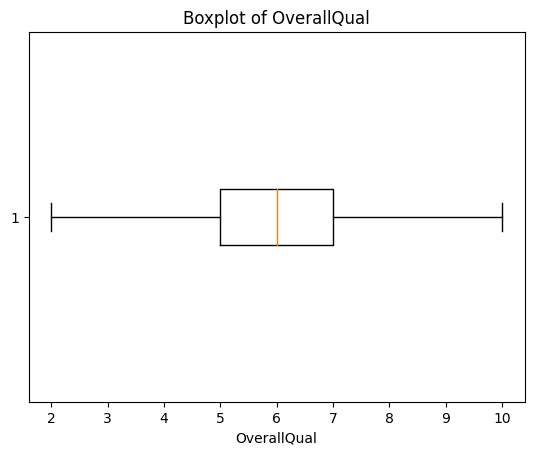

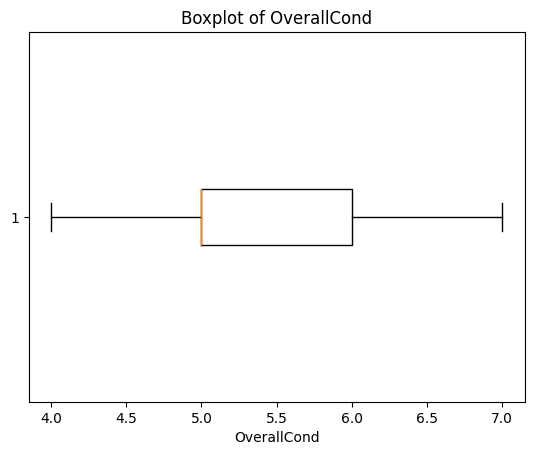

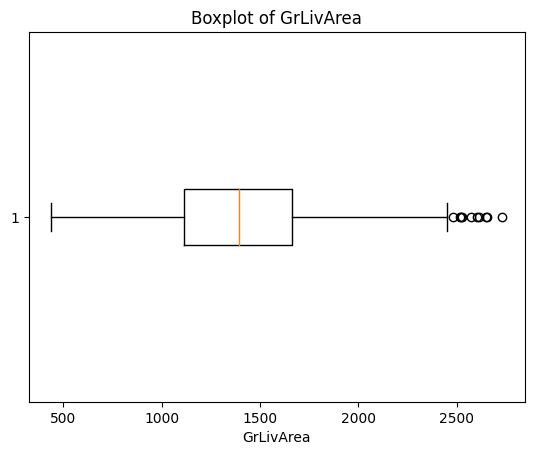

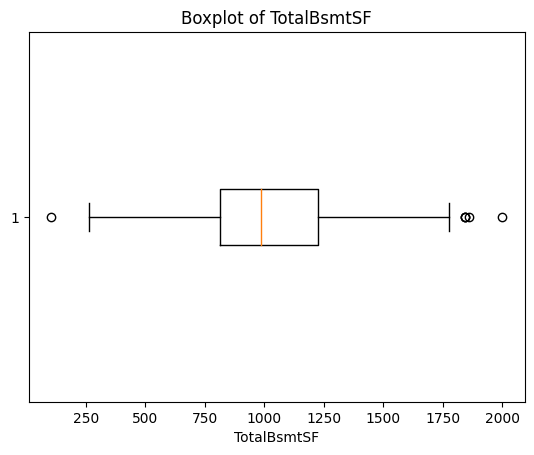

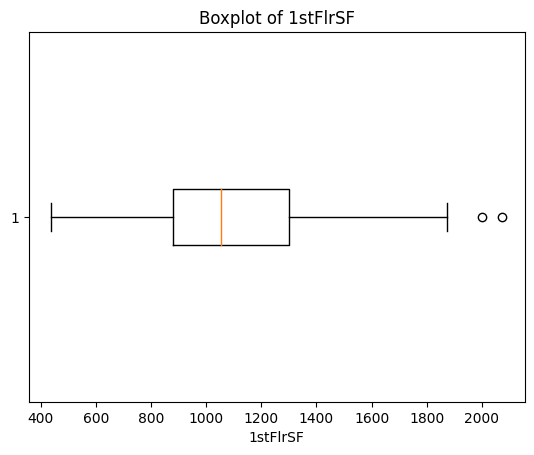

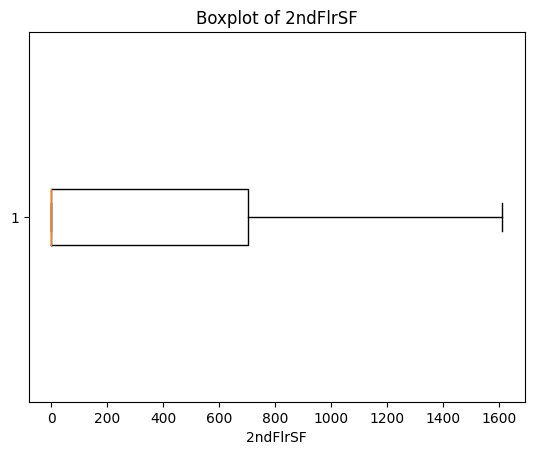

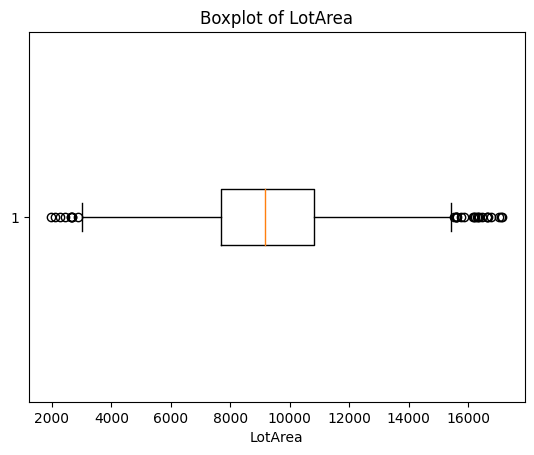

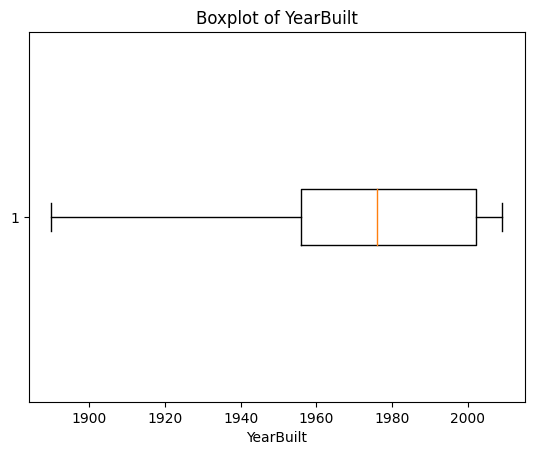

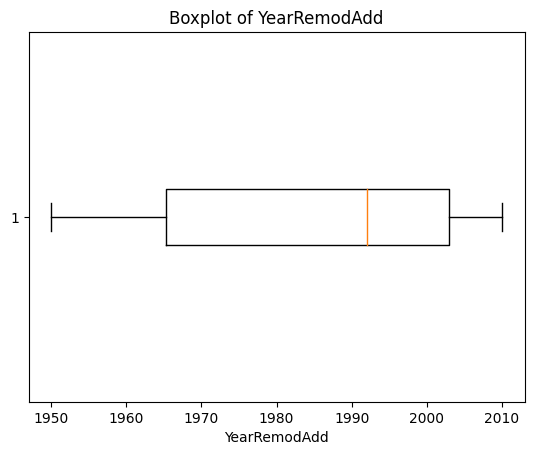

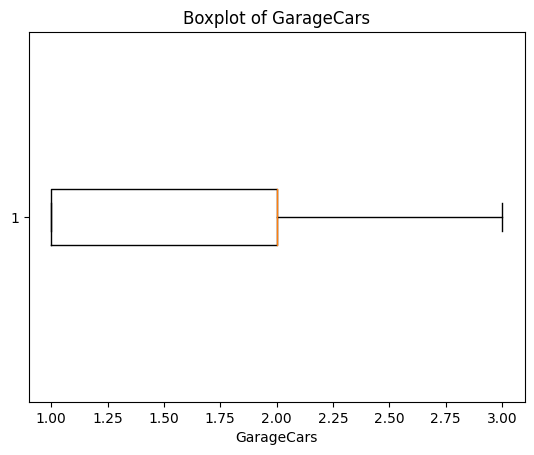

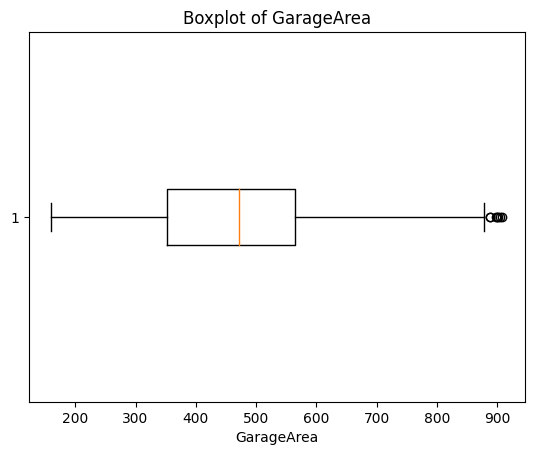

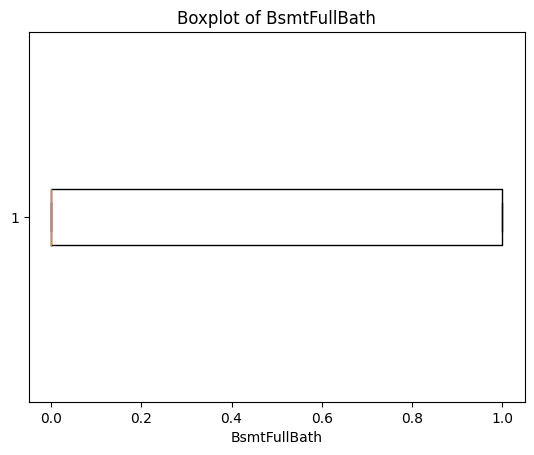

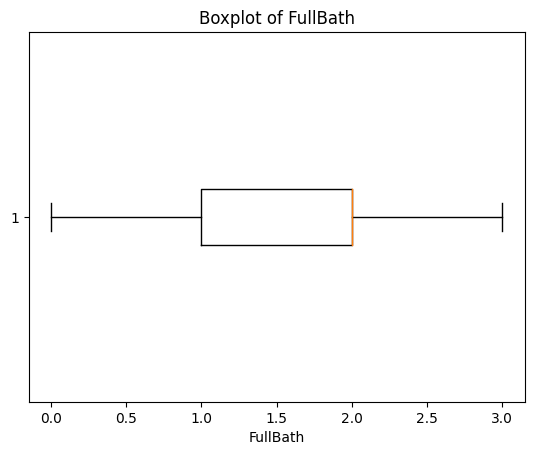

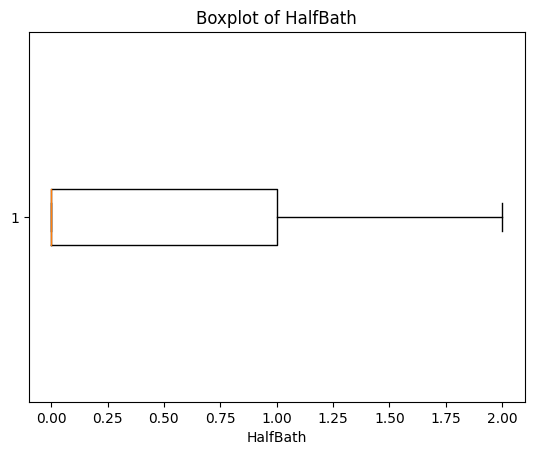

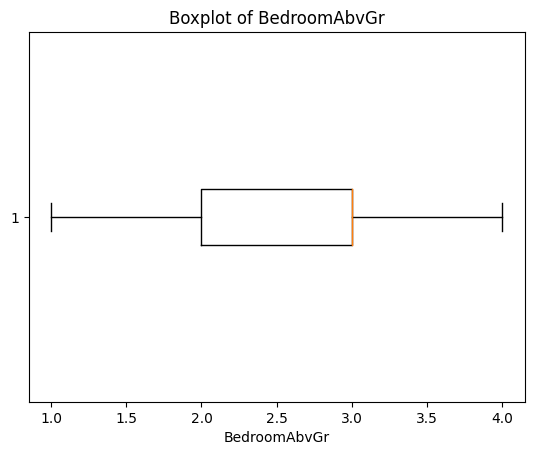

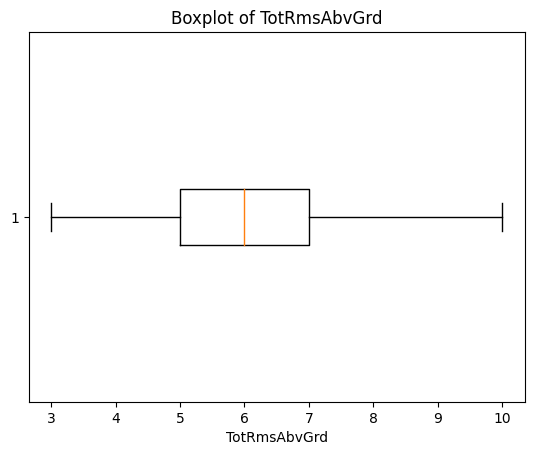

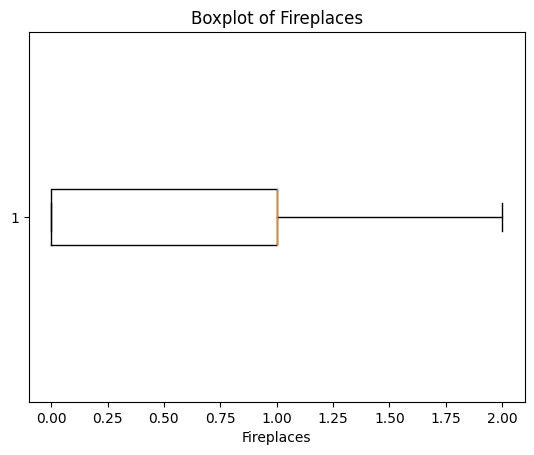

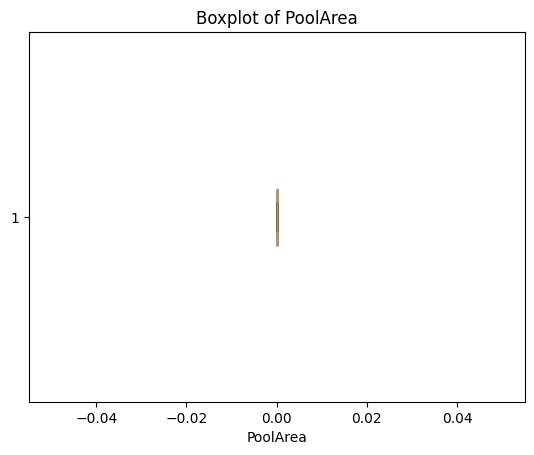

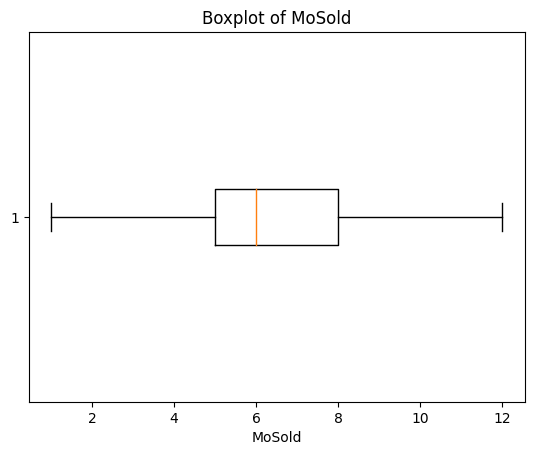

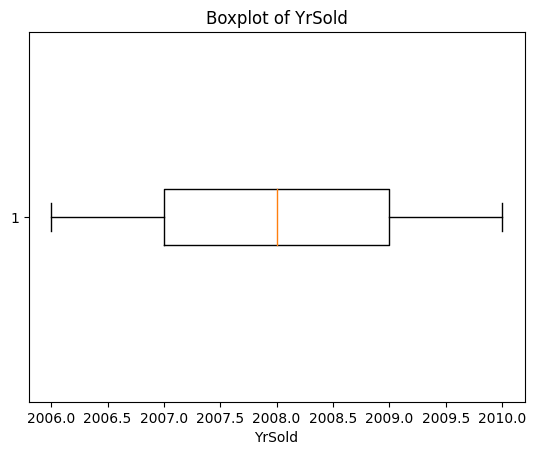

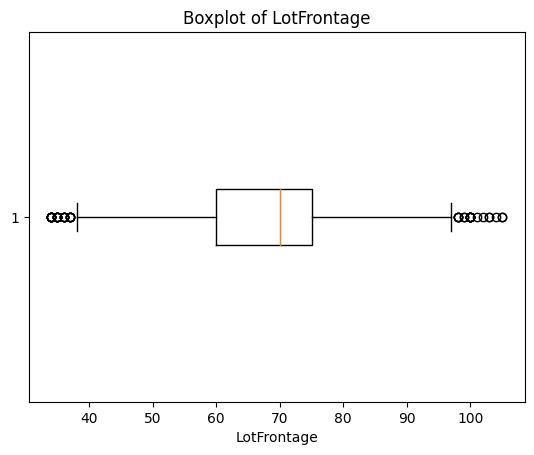

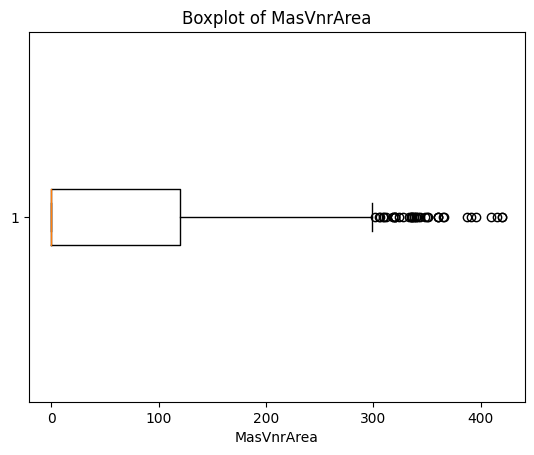

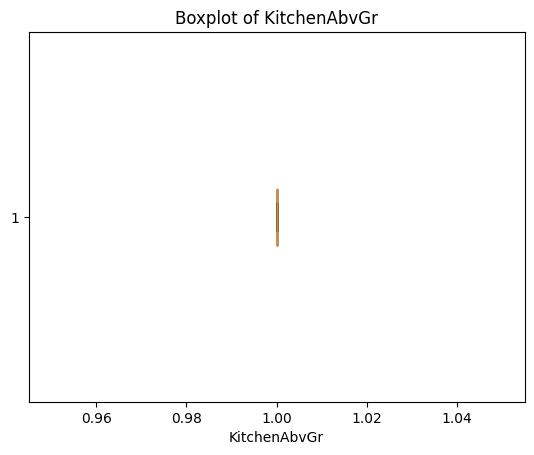

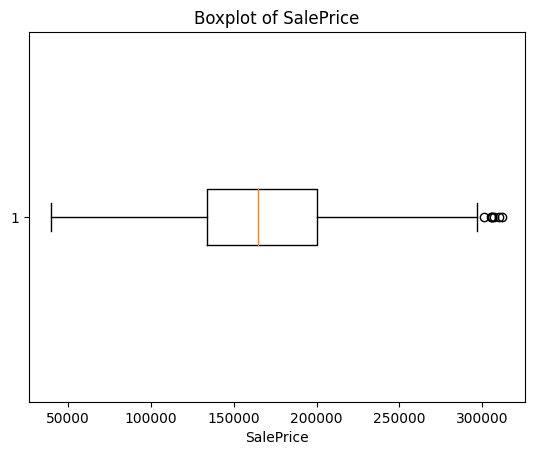

In [ ]:


# Assuming filtered_df_no_outliers is your DataFrame without outliers

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a boxplot for each numeric column in the DataFrame
for column in filtered_df_no_outliers.select_dtypes(include=['number']).columns:
    plt.figure()
    plt.boxplot(filtered_df_no_outliers[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [ ]:


# Assuming filtered_df_no_outliers is your DataFrame without outliers

# Get the names of the numerical columns
numerical_columns_names = filtered_df_no_outliers.select_dtypes(include=['number']).columns.tolist()

print("Numerical column names in filtered_df_no_outliers:")
print(numerical_columns_names)


Numerical column names in filtered_df_no_outliers:
['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'KitchenAbvGr', 'SalePrice']


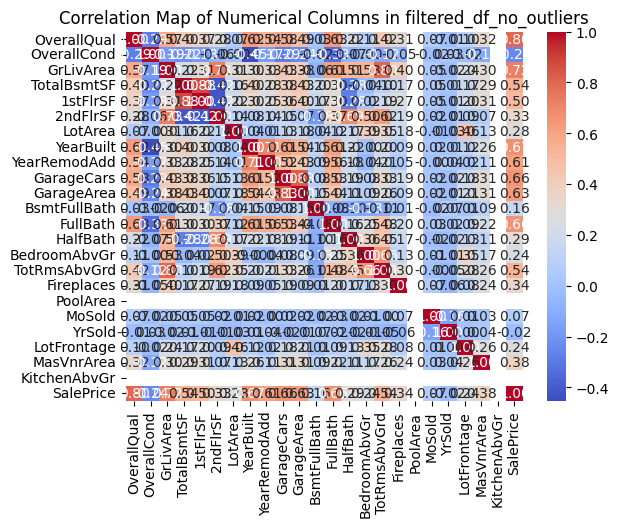

In [ ]:

numerical_columns = filtered_df_no_outliers.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Map of Numerical Columns in filtered_df_no_outliers")
plt.show()

APPLYING LINEAR REGRESSION TO THE MODEL

In [ ]:


# Assuming filtered_df_no_outliers is your DataFrame without outliers
# Assuming 'SalePrice' is the target variable you want to predict
fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']

# Selecting features and target
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 315505461.1585498
R^2 Score: 0.8761023465236407


APPLYING POLYNOMIAL REGRESSION TO THIS

In [ ]:

# Assuming filtered_df_no_outliers is your DataFrame without outliers
# Assuming 'SalePrice' is the target variable you want to predict
fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']

# Selecting features and target
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']

degree = [2, 3, 4]
error_list = []

for d in degree:
    # Adding polynomial features
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Creating and training the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    error_list.append((d, mse, r2))

    print(f"Degree: {d}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

# error_list contains tuples of (degree, mse, r2) for each polynomial degree

Degree: 2
Mean Squared Error: 989149289.3146752
R^2 Score: 0.6115652786678376
Degree: 3
Mean Squared Error: 60474727213.73583
R^2 Score: -22.748168316616013
Degree: 4
Mean Squared Error: 52314519549.69447
R^2 Score: -19.543689453581504


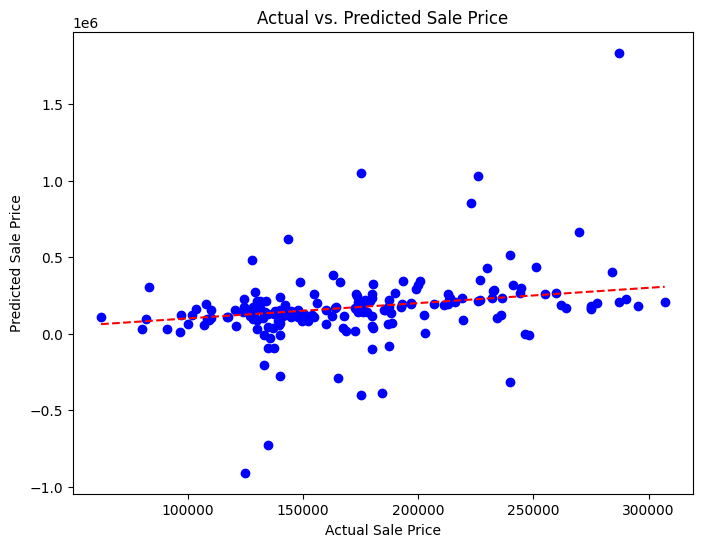

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line for comparison
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

APPLYING RIDGE REGRESSION TO THIS

In [ ]:

# Assuming filtered_df_no_outliers is your DataFrame without outliers
# Assuming 'SalePrice' is the target variable you want to predict
fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']

# Selecting features and target
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Ridge regression model with GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Best parameter
best_alpha = ridge_regressor.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Predicting with the best model
y_pred = ridge_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.01707e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98477e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02517e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.94515e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Best alpha: 10
Mean Squared Error: 314778098.0180533
R^2 Score: 0.8763879789371076


APPLYING LASSO REGRESSION TO THIS

In [ ]:

# Assuming filtered_df_no_outliers is your DataFrame without outliers
# Assuming 'SalePrice' is the target variable you want to predict
fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']

# Selecting features and target
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']

# Creating and training the Lasso regression model with GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X, y)

# Best parameter
best_alpha = lasso_regressor.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Best score (negative mean squared error)
best_score = -lasso_regressor.best_score_
print(f"Minimum Mean Squared Error: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.819e+10, tolerance: 1.666e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+11, tolerance: 1.733e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+11, tolerance: 1.740e

Best alpha: 100
Minimum Mean Squared Error: 298544951.72349


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+09, tolerance: 1.748e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+09, tolerance: 1.694e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+09, tolerance: 2.146e

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
clf=KNeighborsRegressor(200)
clf.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=200)

In [ ]:
y_predict= clf.predict(X_test)
print (mean_squared_error(y_test, y_predict))

2015331617.5049794


APPLYING LNN MODEL

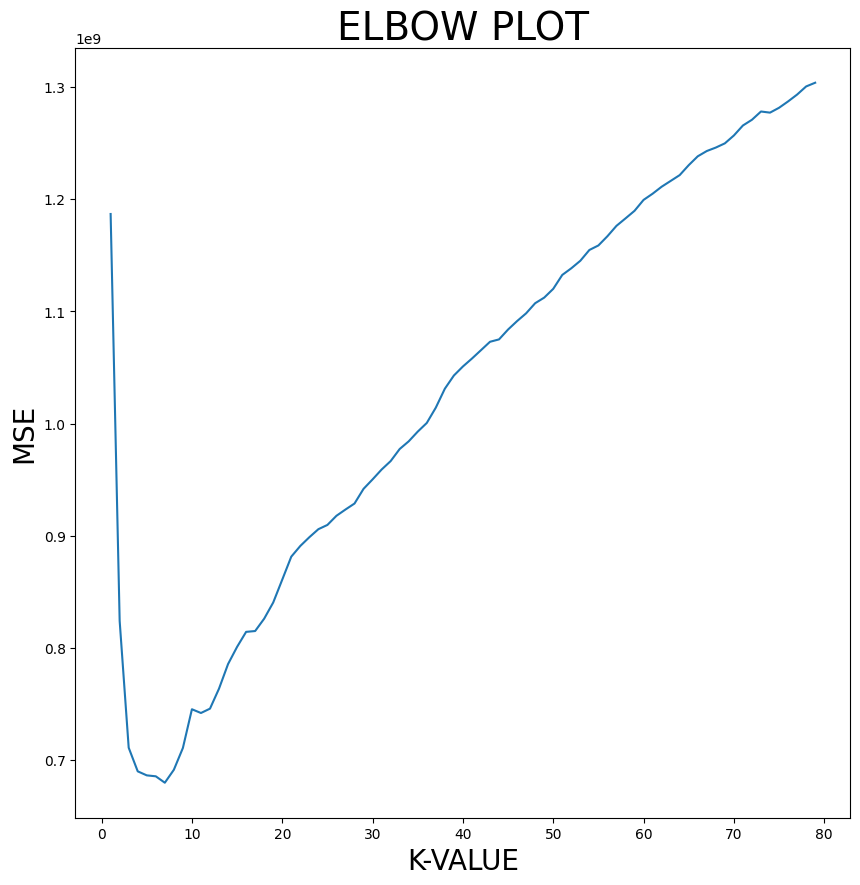

In [ ]:

fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_dict = {}
k_list = np.arange(1, 80, 1)
for k in k_list:
   # knn = KNeighborsRegressor(n_neighbors=k)
    knn = KNeighborsRegressor(n_neighbors=k,weights="distance")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    knn_dict[k] = mse
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(knn_dict.keys(), knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)
plt.show()


In [ ]:
mean_squared_error(y_test,y_pred)

1303990529.9062078

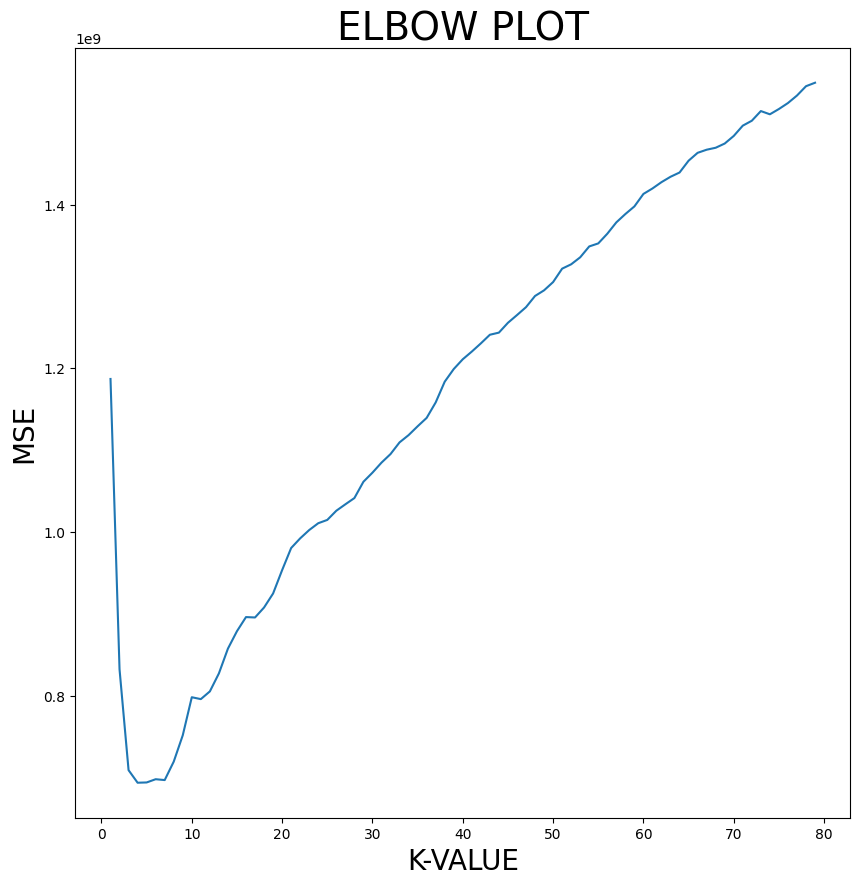

In [ ]:

fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_dict = {}
k_list = np.arange(1, 80, 1)
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    knn_dict[k] = mse
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(knn_dict.keys(), knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)
plt.show()

In [ ]:
mean_squared_error(y_test,y_pred)

1548875080.6904006

using  KNN model

In [ ]:
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {'n_neighbors': [3,4,5,6,7,8,9], 'metric' : ['minkowski'], 'p':[1,2]}

knn = KNeighborsRegressor()
g_cv = GridSearchCV(knn, param_grid=params, cv=5)

g_cv.fit(X_train, y_train)

print(g_cv.best_estimator_, g_cv.best_params_, g_cv.best_score_)

KNeighborsRegressor(n_neighbors=6, p=1) {'metric': 'minkowski', 'n_neighbors': 6, 'p': 1} 0.6960518584670474


In [ ]:
y_pred = g_cv.predict(X_test)

mean_squared_error(y_test,y_pred)

601804257.5845611

using svr model

In [ ]:
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
SupportVectorRegModel=SVR( kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
SupportVectorRegModel.fit(X_train, y_train)
y_pred = SupportVectorRegModel.predict(X_test)
mean_squared_error(y_test,y_pred)

2623925622.204645

so here if we use poly thing it would take a long time because

In [ ]:
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'kernel': ['rbf','linear'],'C': [0.1, 1], 'gamma': [ 'auto'], 'epsilon': [0.001, 0.01, 0.1]}
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_)

SVR(C=1, gamma='auto', kernel='linear') {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'} 0.818397587604537


In [ ]:
y_pred = grid_search.predict(X_test)

mean_squared_error(y_test,y_pred)

462632040.57444495

using tree regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
{'criterion': 'friedman_mse', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
0.7766836709625914
545149765.8554829


using voting classifier now

In [ ]:
param_grid = {
    'estimators': [('svr', SVR()), ('tree_reg', DecisionTreeRegressor()),('knn', KNeighborsRegressor())],
       'voting' :    ['hard'],
    'weights': [None, 'uniform', 'distance']
}
voting_clf = VotingRegressor()
grid_search = GridSearchCV(estimators=voting_clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)
y_predict = grid_search.predict(X_test)

TypeError: VotingRegressor.__init__() missing 1 required positional argument: 'estimators'

applying bragging regressor now

In [ ]:

fo = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea',
      'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'FullBath',
      'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold',
      'LotFrontage', 'MasVnrArea', 'KitchenAbvGr']
X = filtered_df_no_outliers[fo]
y = filtered_df_no_outliers['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator = DecisionTreeRegressor()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
bagging_reg = BaggingRegressor(base_estimator=base_estimator)
grid_search = GridSearchCV(estimator=bagging_reg, param_grid=param_grid, cv=5,verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score =  grid_search.best_score_

print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 100}
0.8605196434894176


In [ ]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)

314838408.9649856


now use random forest regression

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    # 'bootstrap': [True, False],
    'criterion':['squared_error', 'friedman_mse'],
    'min_samples_leaf': [5,10,20,50,100,200]
}
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'criterion': 'friedman_mse', 'max_features': 0.5, 'max_samples': 1.0, 'min_samples_leaf': 5, 'n_estimators': 50}
0.8538040626500321
311927129.8400237


gradient boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
0.8806174688925962
273673346.6794911


adaboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square']
}
ada_reg = AdaBoostRegressor()
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 200}
0.8226238213546717
357171855.186325


xgboost

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
   # 'n_estimators': [100, 200, 300],
   # 'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_reg = XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5,  verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print( best_params)
print( best_score)
y_pred_tree = grid_search.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print( mse_tree)




Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'colsample_bytree': 0.6, 'gamma': 0, 'max_depth': 3, 'subsample': 0.8}
0.8660693427933461
333522261.2851431
